In [1]:
import pandas as pd
import matplotlib as plt
import datetime
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:


# Source: http://web.mta.info/developers/turnstile.html
def get_data(week_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url))
    return pd.concat(dfs)
        
week_nums = [210703, 210710, 210717, 210724,210731, 210807, 210814, 210821, 210828, 210904,210911, 210918, 210925 ]
ttdf = get_data(week_nums)


In [3]:
ttdf

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/26/2021,00:00:00,REGULAR,7592792,2595706
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/26/2021,04:00:00,REGULAR,7592804,2595713
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/26/2021,08:00:00,REGULAR,7592816,2595729
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/26/2021,12:00:00,REGULAR,7592870,2595762
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/26/2021,16:00:00,REGULAR,7592992,2595791
...,...,...,...,...,...,...,...,...,...,...,...
210395,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/24/2021,05:00:00,REGULAR,5554,645
210396,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/24/2021,09:00:00,REGULAR,5554,645
210397,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/24/2021,13:00:00,REGULAR,5554,645
210398,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/24/2021,17:00:00,REGULAR,5554,646


In [4]:
ttdf.columns = [column.strip() for column in ttdf.columns]
ttdf.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [5]:
ttdf["DATE_TIME"] = pd.to_datetime(ttdf.DATE+ " "+ttdf.TIME, format="%m/%d/%Y %H:%M:%S")
ttdf.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/26/2021,00:00:00,REGULAR,7592792,2595706,2021-06-26 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/26/2021,04:00:00,REGULAR,7592804,2595713,2021-06-26 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/26/2021,08:00:00,REGULAR,7592816,2595729,2021-06-26 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/26/2021,12:00:00,REGULAR,7592870,2595762,2021-06-26 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/26/2021,16:00:00,REGULAR,7592992,2595791,2021-06-26 16:00:00


In [6]:
# Sanity Check to verify that "C/A", "UNIT", "SCP", "STATION", "DATE_TIME" is unique
(ttdf
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(5)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
2702968,S101,R070,00-00-02,ST. GEORGE,2021-09-16 08:00:00,2
2702884,S101,R070,00-00-02,ST. GEORGE,2021-09-02 16:00:00,2
2455849,R516,R291,00-00-00,33 ST-RAWSON ST,2021-08-24 16:00:00,2
1390007,N535,R220,00-00-01,CARROLL ST,2021-08-31 16:00:00,2
1389458,N535,R220,00-00-00,CARROLL ST,2021-08-31 16:00:00,2


In [7]:
# Get rid of the duplicate entry
ttdf.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], 
                          inplace=True, ascending=False)
ttdf.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)

In [8]:
# Sanity Check to verify that "C/A", "UNIT", "SCP", "STATION", "DATE_TIME" is unique
(ttdf
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(5)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
0,A002,R051,02-00-00,59 ST,2021-06-26 00:00:00,1
1816191,R139,R031,04-00-00,34 ST-PENN STA,2021-09-05 12:00:00,1
1816193,R139,R031,04-00-00,34 ST-PENN STA,2021-09-05 20:00:00,1
1816194,R139,R031,04-00-00,34 ST-PENN STA,2021-09-06 00:00:00,1
1816195,R139,R031,04-00-00,34 ST-PENN STA,2021-09-06 04:00:00,1


In [9]:
# Drop Exits and Desc Column.  To prevent errors in multiple run of cell, errors on drop is ignored
ttdf = ttdf.drop(["EXITS", "DESC"], axis=1, errors="ignore")

In [10]:
ttdf


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,DATE_TIME
210399,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/24/2021,21:00:00,5554,2021-09-24 21:00:00
210398,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/24/2021,17:00:00,5554,2021-09-24 17:00:00
210397,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/24/2021,13:00:00,5554,2021-09-24 13:00:00
210396,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/24/2021,09:00:00,5554,2021-09-24 09:00:00
210395,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/24/2021,05:00:00,5554,2021-09-24 05:00:00
...,...,...,...,...,...,...,...,...,...,...
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/26/2021,16:00:00,7592992,2021-06-26 16:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/26/2021,12:00:00,7592870,2021-06-26 12:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/26/2021,08:00:00,7592816,2021-06-26 08:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/26/2021,04:00:00,7592804,2021-06-26 04:00:00


In [11]:
ttdf_daily = (ttdf
                        .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"],as_index=False)
                        .ENTRIES.first())

In [12]:
ttdf_daily

,C/A,UNIT,SCP,STATION,DATE,ENTRIES
0,A002,R051,02-00-00,59 ST,06/26/2021,7593116
1,A002,R051,02-00-00,59 ST,06/27/2021,7593427
2,A002,R051,02-00-00,59 ST,06/28/2021,7593979
3,A002,R051,02-00-00,59 ST,06/29/2021,7594528
4,A002,R051,02-00-00,59 ST,06/30/2021,7595154
...,...,...,...,...,...,...
454570,TRAM2,R469,00-05-01,RIT-ROOSEVELT,09/20/2021,5554
454571,TRAM2,R469,00-05-01,RIT-ROOSEVELT,09/21/2021,5554
454572,TRAM2,R469,00-05-01,RIT-ROOSEVELT,09/22/2021,5554
454573,TRAM2,R469,00-05-01,RIT-ROOSEVELT,09/23/2021,5554


In [13]:
ttdf_daily[["PREV_DATE", "PREV_ENTRIES"]] = (ttdf_daily
                                                       .groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"]
                                                       .apply(lambda grp: grp.shift(1)))



<ipython-input-13-023ee98fc1ee>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  ttdf_daily[["PREV_DATE", "PREV_ENTRIES"]] = (ttdf_daily


In [14]:
ttdf_daily.head()


,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
0,A002,R051,02-00-00,59 ST,06/26/2021,7593116,NaN,NaN
1,A002,R051,02-00-00,59 ST,06/27/2021,7593427,06/26/2021,7593116.0
2,A002,R051,02-00-00,59 ST,06/28/2021,7593979,06/27/2021,7593427.0
3,A002,R051,02-00-00,59 ST,06/29/2021,7594528,06/28/2021,7593979.0
4,A002,R051,02-00-00,59 ST,06/30/2021,7595154,06/29/2021,7594528.0


In [15]:
ttdf_daily.dropna(subset=["PREV_DATE","PREV_ENTRIES"]
                                            ,axis=0,inplace=True)

In [16]:
ttdf_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
1,A002,R051,02-00-00,59 ST,06/27/2021,7593427,06/26/2021,7593116.0
2,A002,R051,02-00-00,59 ST,06/28/2021,7593979,06/27/2021,7593427.0
3,A002,R051,02-00-00,59 ST,06/29/2021,7594528,06/28/2021,7593979.0
4,A002,R051,02-00-00,59 ST,06/30/2021,7595154,06/29/2021,7594528.0
5,A002,R051,02-00-00,59 ST,07/01/2021,7595703,06/30/2021,7595154.0


In [17]:
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        # Maybe counter is reversed?
        counter = -counter
    if counter > max_counter:
        # Maybe counter was reset to 0? 
        print(row["ENTRIES"], row["PREV_ENTRIES"])
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
    if counter > max_counter:
        # Check it again to make sure we're not still giving a counter that's too big
        return 0
    return counter

# If counter is > 1Million, then the counter might have been reset.  
# Just set it to zero as different counters have different cycle limits
# It'd probably be a good idea to use a number even significantly smaller than 1 million as the limit!
ttdf_daily["DAILY_ENTRIES"] = ttdf_daily.apply(get_daily_counts, axis=1, max_counter=1000000)

353 8049630.0
167790157 702266.0
310 5609562.0
35 9768753.0
33565227 188178.0
48 8724126.0
511 3272795.0
5946 4298704.0
0 117440512.0
327975 7577027.0
67109632 14.0
327682 67109640.0
15 67109632.0
36 1198448.0
46 5405351.0
200 705357551.0
16777220 1037157.0
6 16034831.0
386 6213955.0
37 1950780.0
443 15689395.0
8 1255797.0
5 11123659.0
256 3153907.0
126 3102523.0
19 2570919.0
50362839 251769.0
114 1953264.0
169 4788322.0
82 6249985.0
67 1040931923.0
118 909043641.0
197214 1890967.0
716 3145979.0
285 3530461.0
35 10737302.0
201331968 798740.0
154 5768873.0
1089962154 146746170.0
3539010 51735353.0
124 2030205.0
112 7682427.0
1189019240 3740789.0
346167 14045092.0
14051313 346213.0
774447 9475375.0
9482240 774522.0
7979566 789214.0
796277 7979671.0
1278449 8197329.0
8205884 1278639.0
635 4005927.0
4006679 635.0
113 1684097.0
327683 50346231.0
41 6481415.0
92 1383110115.0


In [18]:
ttdf_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
1,A002,R051,02-00-00,59 ST,06/27/2021,7593427,06/26/2021,7593116.0,311.0
2,A002,R051,02-00-00,59 ST,06/28/2021,7593979,06/27/2021,7593427.0,552.0
3,A002,R051,02-00-00,59 ST,06/29/2021,7594528,06/28/2021,7593979.0,549.0
4,A002,R051,02-00-00,59 ST,06/30/2021,7595154,06/29/2021,7594528.0,626.0
5,A002,R051,02-00-00,59 ST,07/01/2021,7595703,06/30/2021,7595154.0,549.0


In [19]:
#daily time series for each STATION, by adding up all the turnstiles in a station.

statdf_daily = ttdf_daily.groupby(["STATION", "DATE"])[['DAILY_ENTRIES']].sum().reset_index()
statdf_daily



,STATION,DATE,DAILY_ENTRIES
0,1 AV,06/27/2021,6835.0
1,1 AV,06/28/2021,7529.0
2,1 AV,06/29/2021,7231.0
3,1 AV,06/30/2021,7588.0
4,1 AV,07/01/2021,7687.0
...,...,...,...
34074,ZEREGA AV,09/20/2021,1408.0
34075,ZEREGA AV,09/21/2021,1428.0
34076,ZEREGA AV,09/22/2021,1463.0
34077,ZEREGA AV,09/23/2021,1433.0


In [20]:
#Over multiple weeks, sum total ridership for each 
#station and sort them, so you can find out the stations 
#with the highest traffic during the time you investigate


statdf_totals = statdf_daily.groupby('STATION').sum().sort_values('DAILY_ENTRIES', ascending=False).reset_index()

statdf_totals


,STATION,DAILY_ENTRIES
0,JUNCTION BLVD,5598373.0
1,34 ST-PENN STA,4878624.0
2,FULTON ST,3854879.0
3,86 ST,3490332.0
4,PATH NEW WTC,3355018.0
...,...,...
374,BEACH 44 ST,26090.0
375,BEACH 98 ST,20527.0
376,BEACH 105 ST,13193.0
377,BROAD CHANNEL,10441.0


Text(0, 0.5, '# of Entries (in millions)')

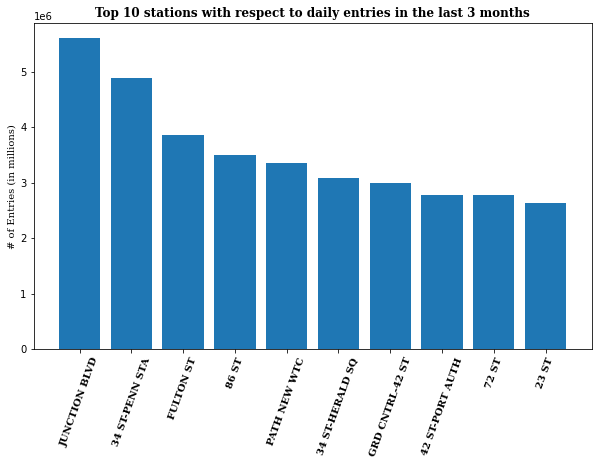

In [21]:
 

plt.figure(figsize=(10,6))
plt.bar(x=statdf_totals['STATION'][:10] , height = statdf_totals['DAILY_ENTRIES'][:10])
plt.xticks(rotation=70 , family = 'serif',weight='bold');
plt.title("Top 10 stations with respect to daily entries in the last 3 months", family = 'serif',weight='bold')
plt.ylabel("# of Entries (in millions)",family='serif')



[Text(0, 0, 'JUNCTION BLVD'),
 Text(0, 1, '34 ST-PENN STA'),
 Text(0, 2, 'FULTON ST'),
 Text(0, 3, '86 ST'),
 Text(0, 4, 'PATH NEW WTC')]

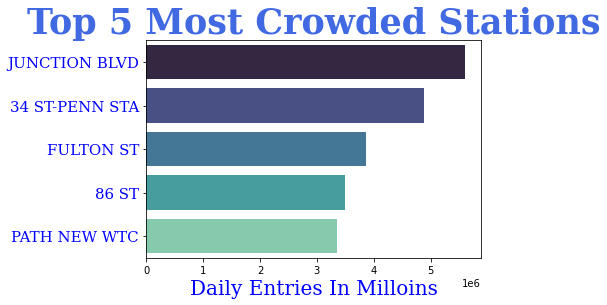

In [41]:
plot = sns.barplot(y='STATION',x='DAILY_ENTRIES',data=statdf_totals.head(5),palette='mako')
plot.set_title('Top 5 Most Crowded Stations',family='serif',fontsize = 35,weight='bold',color='royalblue')
plot.set_xlabel('Daily Entries In Milloins',family='serif',fontsize=20,color='blue')
plot.set_ylabel('')
plot.set_yticklabels(plot.get_yticklabels(), fontsize=15,family='serif',color='blue')



